# Figure S15: Manhattan plots of common variant associations (APOE4 adjustment)

Note: For the meta-analysis the p-value column is "P.value"

In [1]:
plots <- function(file,annofile,sample,out){
library('dplyr')
library('ggrepel')
library('tidyr')
library('ggplot2')
#Load your data
gwas <- read.table(gzfile(file),sep='\t', header=T)
snpsOfInterest <- gwas %>%
filter(P.value < 5e-08)
annot <- read.csv(annofile)
# Merge snps of interest with the annotation info
snps_annot <- merge(snpsOfInterest,annot,by="SNP")
# Prepare the dataset
dat <- gwas %>%  
# Compute chromosome size
group_by(CHR) %>% 
summarise(chr_len=max(POS)) %>%
# Calculate cumulative position of each chromosome
mutate(tot=cumsum(as.numeric(chr_len))- as.numeric(chr_len)) %>%
select(-chr_len) %>%      
# Add this info to the initial dataset
left_join(gwas, ., by=c("CHR"="CHR")) %>%
# Add a cumulative position of each SNP
arrange(CHR, POS) %>%
mutate(BPcum=POS+tot) %>%  
# Add highlight and annotation information
mutate(is_highlight=ifelse(SNP %in% snpsOfInterest$SNP, "yes", "no")) %>%
mutate(is_annotate=ifelse(P.value<5e-08, "yes", "no")) %>%
# Filter SNP to make the plot lighter
filter(-log10(P.value)>0.05)
# Merge the gwas filtered data with the annotation
dat_anno <- merge(x = dat, y = snps_annot[ , c("SNP", "Gene")], by = "SNP", all.x=TRUE)
gene_anno <- dat_anno %>% 
  filter(!is.na(Gene)) %>%
  group_by(Gene) %>% 
  slice_min(order_by=P.value)
dat_anno <- dat_anno %>% mutate(is_top = ifelse(SNP %in% gene_anno$SNP, "yes", "no"))
# Create axis for the manhattan plot
axisdf = dat %>% group_by(CHR) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )
# Make the plot
sig <- 5e-08
#if (0 == 0) ylim <- abs(floor(log10(min(dat$'P')))) + 2
ylim <- 13
y_limits <- c(8, ylim)
dat_anno$color=ifelse(dat_anno$CHR%%2 ==0 , "gray", "black")
dat_anno$genegroup=ifelse(dat_anno$CHR%%2 ==0 , "Other1", "Other2")

manhplot <- ggplot(dat_anno, aes(x=BPcum, y=-log10(P.value), 
                             color = as.factor(CHR), size = -log10(P.value))) +
    # Show all points
    geom_point( aes(color=as.factor(CHR)), alpha=0.8, size=1.3) +
    # custom X axis:
    scale_x_continuous(label = axisdf$CHR, breaks= axisdf$center) +
    scale_y_continuous(expand = c(0, 0), limits=c(NA, ylim)) +   # remove space between plot area and x axis
    # Add highlighted points
    #geom_point(data=subset(dat_anno, is_highlight=="yes"), color="red", size=2) +

    # Add different color geom_points
    #geom_point(data=dat_anno[(dat_anno$genegroup=="Other1"),],color="gray", alpha=0.8, size=1.3) + 
    #geom_point(data=dat_anno[(dat_anno$genegroup=="Other2"),],color="black", alpha=0.8, size=1.3) +
    #geom_point(data=subset(dat_anno, is_highlight=="yes"),aes(color=genegroup), alpha=0.8, size=1.3) +
    scale_color_manual(values = c("#FFC20A","#D41159","#39A2FA","#1AFF1A","#4B0092",
                               "#994F00","#006CD1","#D35FB7","#E1BE6A","#40B0A6","#003AB5","#DC3220","#E66100","#5D3A9B","#1A85FF",
                               "#24E1A4","#E43034","#FFB000","#80BBA2","#E799D6","#5D5A10","#980EA0")) +
   #color scal options
  # scale_color_manual(values = c("#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a",
 # "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6","#ffff99", "#8e0152", "#7fc97f", "#fdc086", "#386cb0",
  #"#f0027f", "#bf5b17", "#666666", "#984ea3", "#377eb8", "#4daf4a","#5d5a10"))+
    # Add significance level line
    geom_hline(yintercept = -log10(sig), color = "red1", linetype = "dashed") +
    # Add label using ggrepel to avoid overlapping, if annotate option is used label the top snps in each gene  
    geom_label_repel( data=subset(dat_anno, is_top=="yes"),
                      #fill=subset(dat_anno, is_top=="yes")$color,
                      aes(label=Gene), size=4,fontface = "italic",  max.overlaps = Inf, ylim = y_limits, box.padding = unit(0.35, "lines"), point.padding = unit(0.5, "lines")) +
    #create X and Y axes labels
    labs(x = "Chromosome",
     y = "-log10(P.value)") +
    # Custom the theme:
    theme_classic() +
    theme( 
      legend.position="none",
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      axis.text.x = element_text(angle = 90, size = 8, vjust = 0.5))
# To save a plot created with ggplot2 you have to use to print() function
png(out, width = 6, height = 4, unit='in', res=300)
print(manhplot)
dev.off()
}

**Panel A: AD-Family meta-analysis**

In [3]:
file <- "/mnt/mfs/statgen/alzheimers-family/AD_common_variants/gmmat/results2/APOE4/metal/meta.APOE4.txt"
annofile <- "~/project_bst/annotation/AD_family_common_variants_meta_APOE4.csv"
sample <- "AD_family"
out <- "~/project_bst/AD_family_Rare_variants/AD_family_common_variants_meta_APOE4.png"
plots(file,annofile,sample,out)

png 
  2

> /home/bst2126/project_bst/AD_family_Rare_variants/AD_family_common_variants_meta_APOE4.png (603.2 KiB):

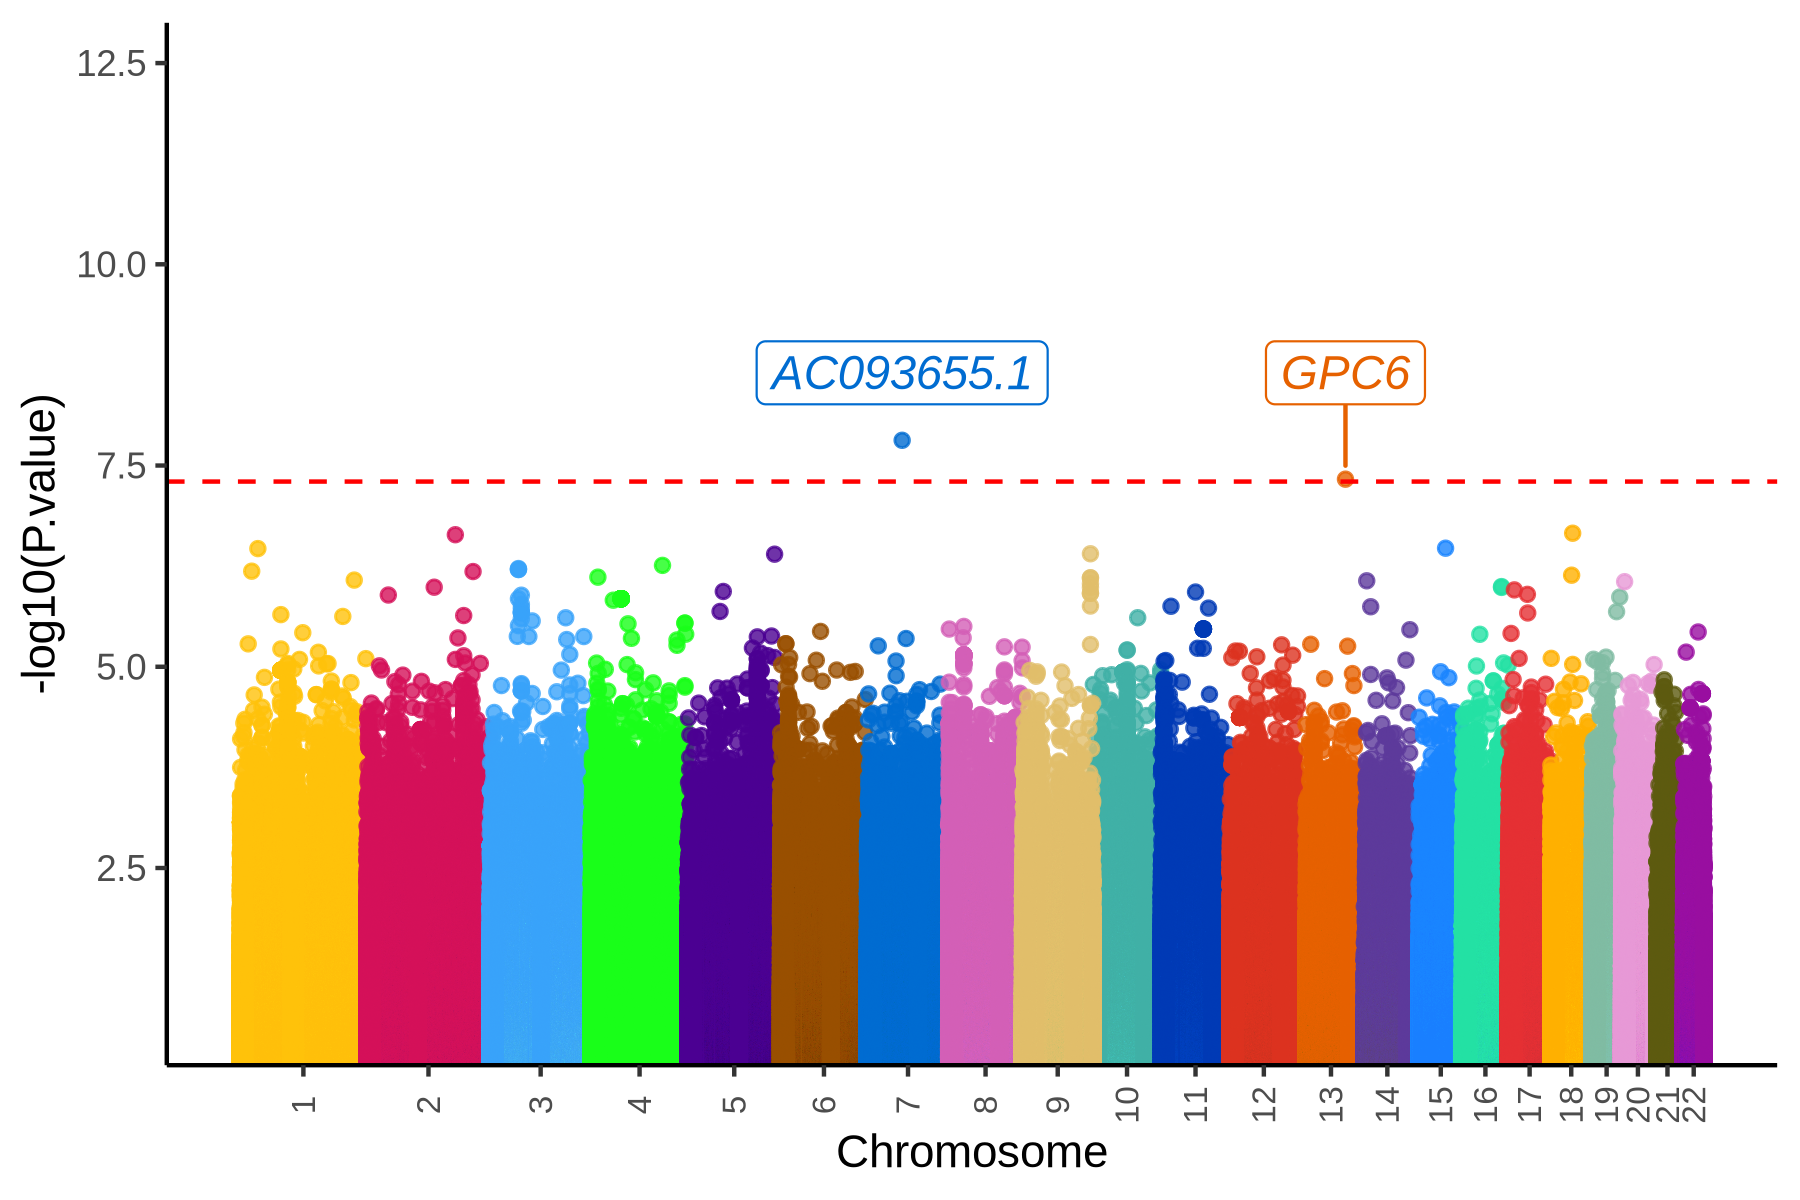

In [4]:
%preview ~/project_bst/AD_family_Rare_variants/AD_family_common_variants_meta_APOE4.png -n

**Panel B: ADSP meta-analysis**

In [6]:
file <- "/mnt/mfs/statgen/alzheimers-family/ADSP_2023/gmmat/apoe/meta.gmmat_APOE4.txt"
annofile <- "~/project_bst/annotation/ADSP_common_variants_meta_APOE4.csv"
sample <- "ADSP"
out <- "~/project_bst/AD_family_Rare_variants/ADSP_common_variants_meta_APOE4.png"
plots(file,annofile,sample,out)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '~/project_bst/annotation/ADSP_common_variants_meta_APOE4.csv'”


png 
  2

> /home/bst2126/project_bst/AD_family_Rare_variants/ADSP_common_variants_meta_APOE4.png (405.0 KiB):

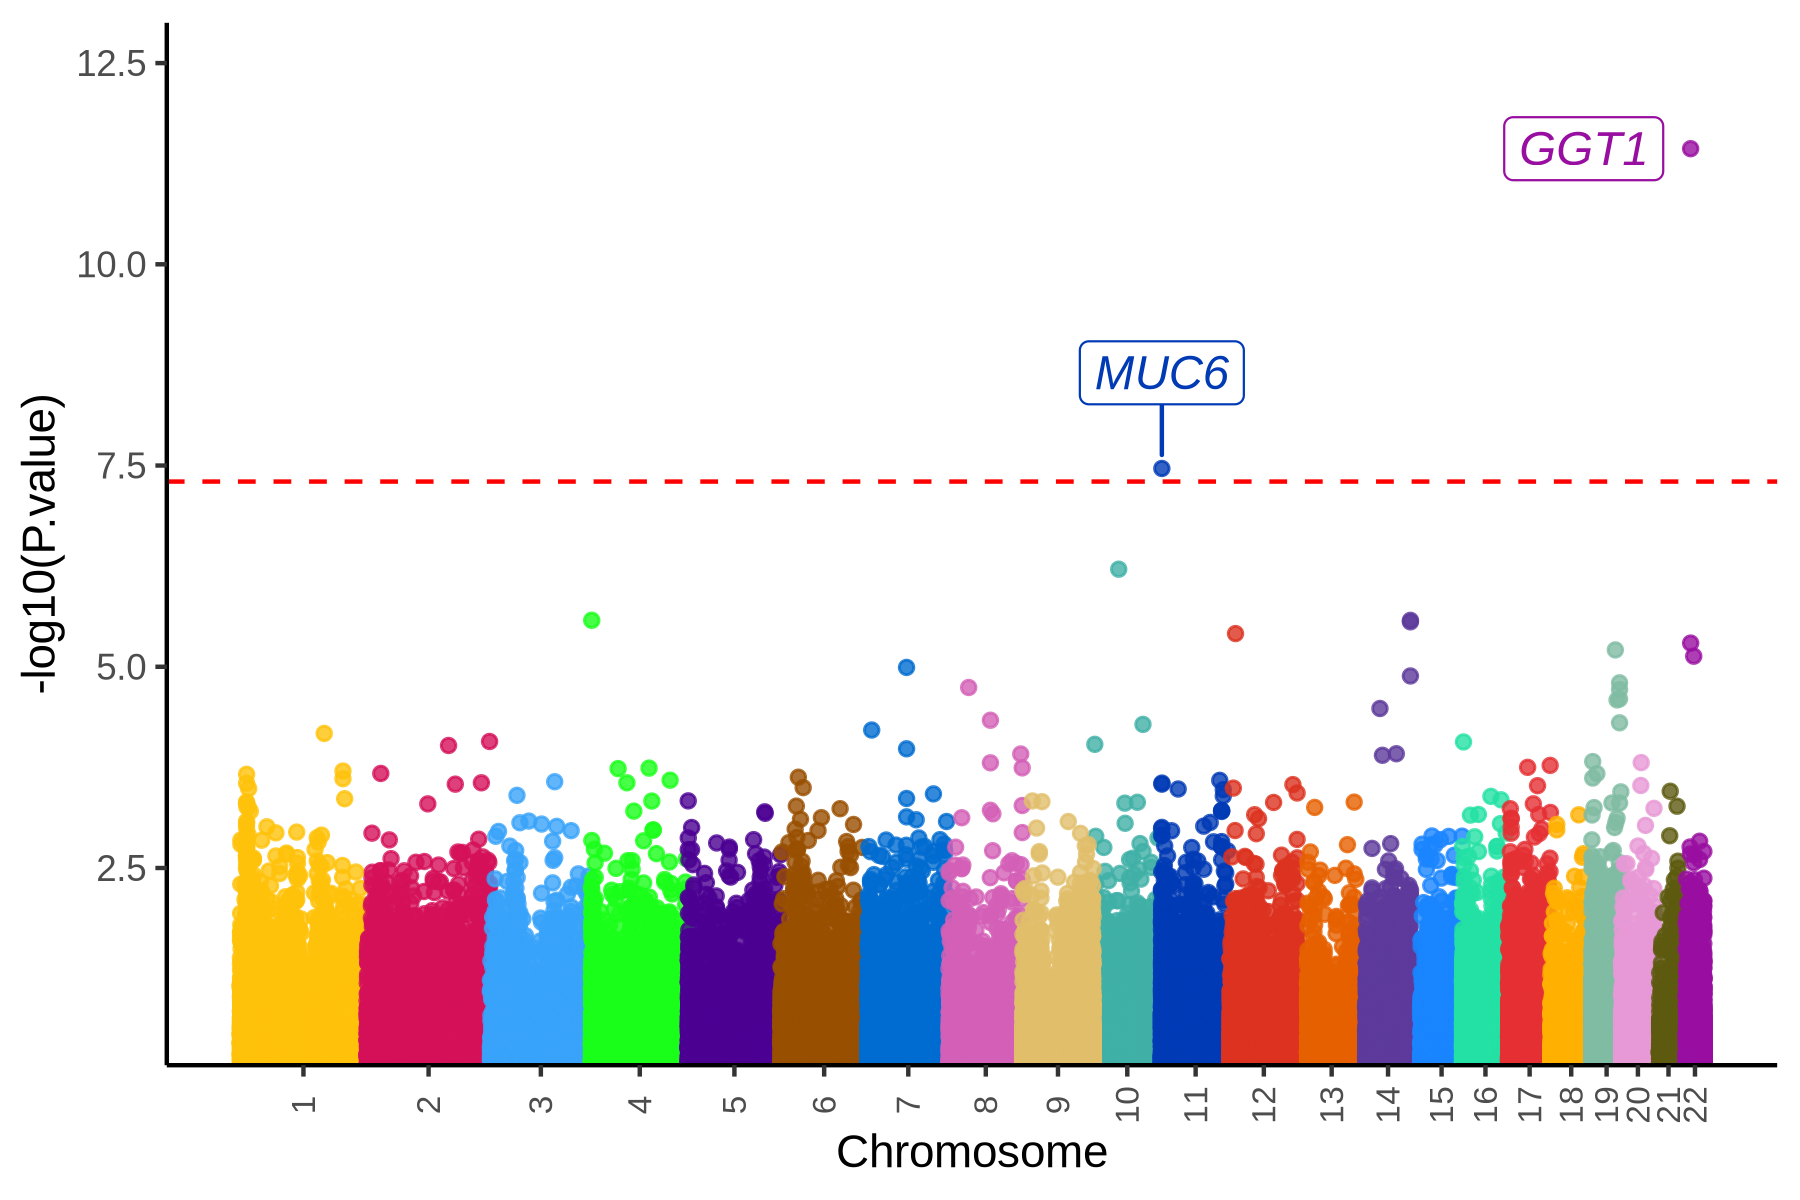

In [7]:
%preview ~/project_bst/AD_family_Rare_variants/ADSP_common_variants_meta_APOE4.png -n

Note: Population specific analysis

In [8]:
plots<- function(file,annofile,sample,out){
library('dplyr')
library('ggrepel')
library('tidyr')
library('ggplot2')
#Load your data
gwas <- read.table(gzfile(file),sep='\t', header=T)
snpsOfInterest <- gwas %>%
filter(PVAL < 5e-08)
annot <- read.csv(annofile)
# Merge snps of interest with the annotation info
snps_annot <- merge(snpsOfInterest,annot,by="SNP")
# Prepare the dataset
dat <- gwas %>%  
# Compute chromosome size
group_by(CHR) %>% 
summarise(chr_len=max(POS)) %>%
# Calculate cumulative position of each chromosome
mutate(tot=cumsum(as.numeric(chr_len))- as.numeric(chr_len)) %>%
select(-chr_len) %>%      
# Add this info to the initial dataset
left_join(gwas, ., by=c("CHR"="CHR")) %>%
# Add a cumulative position of each SNP
arrange(CHR, POS) %>%
mutate(BPcum=POS+tot) %>%  
# Add highlight and annotation information
mutate(is_highlight=ifelse(SNP %in% snpsOfInterest$SNP, "yes", "no")) %>%
mutate(is_annotate=ifelse(PVAL<5e-08, "yes", "no")) %>%
# Filter SNP to make the plot lighter
filter(-log10(PVAL)>0.05)
# Merge the gwas filtered data with the annotation
dat_anno <- merge(x = dat, y = snps_annot[ , c("SNP", "Gene")], by = "SNP", all.x=TRUE)
gene_anno <- dat_anno %>% 
  filter(!is.na(Gene)) %>%
  group_by(Gene) %>% 
  slice_min(order_by=PVAL)
dat_anno <- dat_anno %>% mutate(is_top = ifelse(SNP %in% gene_anno$SNP, "yes", "no"))
# Create axis for the manhattan plot
axisdf = dat %>% group_by(CHR) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )
# Make the plot
sig <- 5e-08
#if (0 == 0) ylim <- abs(floor(log10(min(dat$'P')))) + 2
ylim <- 18
y_limits <- c(8, ylim)
dat_anno$color=ifelse(dat_anno$CHR%%2 ==0 , "gray", "black")
dat_anno$genegroup=ifelse(dat_anno$CHR%%2 ==0 , "Other1", "Other2")

manhplot <- ggplot(dat_anno, aes(x=BPcum, y=-log10(PVAL), 
                             color = as.factor(CHR), size = -log10(PVAL))) +
    # Show all points
    geom_point( aes(color=as.factor(CHR)), alpha=0.8, size=1.3) +
    # custom X axis:
    scale_x_continuous(label = axisdf$CHR, breaks= axisdf$center) +
    scale_y_continuous(expand = c(0, 0), limits=c(NA, ylim)) +   # remove space between plot area and x axis
    # Add highlighted points
    #geom_point(data=subset(dat_anno, is_highlight=="yes"), color="red", size=2) +

    # Add different color geom_points
    #geom_point(data=dat_anno[(dat_anno$genegroup=="Other1"),],color="gray", alpha=0.8, size=1.3) + 
    #geom_point(data=dat_anno[(dat_anno$genegroup=="Other2"),],color="black", alpha=0.8, size=1.3) +
    #geom_point(data=subset(dat_anno, is_highlight=="yes"),aes(color=genegroup), alpha=0.8, size=1.3) +
    scale_color_manual(values = c("#FFC20A","#D41159","#39A2FA","#1AFF1A","#4B0092",
                               "#994F00","#006CD1","#D35FB7","#E1BE6A","#40B0A6","#003AB5","#DC3220","#E66100","#5D3A9B","#1A85FF",
                               "#24E1A4","#E43034","#FFB000","#80BBA2","#E799D6","#5D5A10","#980EA0")) +
   #color scal options
  # scale_color_manual(values = c("#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a",
 # "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6","#ffff99", "#8e0152", "#7fc97f", "#fdc086", "#386cb0",
  #"#f0027f", "#bf5b17", "#666666", "#984ea3", "#377eb8", "#4daf4a","#5d5a10"))+
    # Add significance level line
    geom_hline(yintercept = -log10(sig), color = "red1", linetype = "dashed") +
    # Add label using ggrepel to avoid overlapping, if annotate option is used label the top snps in each gene  
    geom_label_repel( data=subset(dat_anno, is_top=="yes"),
                      #fill=subset(dat_anno, is_top=="yes")$color,
                      aes(label=Gene), size=4,fontface = "italic",  max.overlaps = Inf, ylim = y_limits, box.padding = unit(0.35, "lines"), point.padding = unit(0.5, "lines")) +
    #create X and Y axes labels
    labs(x = "Chromosome",
     y = "-log10(P.value)") +
    # Custom the theme:
    theme_classic() +
    theme( 
      legend.position="none",
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      axis.text.x = element_text(angle = 90, size = 8, vjust = 0.5))
# To save a plot created with ggplot2 you have to use to print() function
png(out, width = 6, height = 4, unit='in', res=300)
print(manhplot)
dev.off()
}

**Panel C: AD-family Non-Hispanic Whites**

In [9]:
file <- "/mnt/mfs/statgen/alzheimers-family/AD_common_variants/gmmat/results2/APOE4/European/European.pca.projected_AD.GMMAT.snp_stats_original_columns.gz"
annofile <- "~/project_bst/annotation/AD_family_common_variants_NHW_APOE4.csv"
sample <- "AD_family"
out <- "~/project_bst/AD_family_Rare_variants/AD_family_common_variants_NHW_APOE4.png"
plots(file,annofile,sample,out)

png 
  2

> /home/bst2126/project_bst/AD_family_Rare_variants/AD_family_common_variants_NHW_APOE4.png (407.7 KiB):

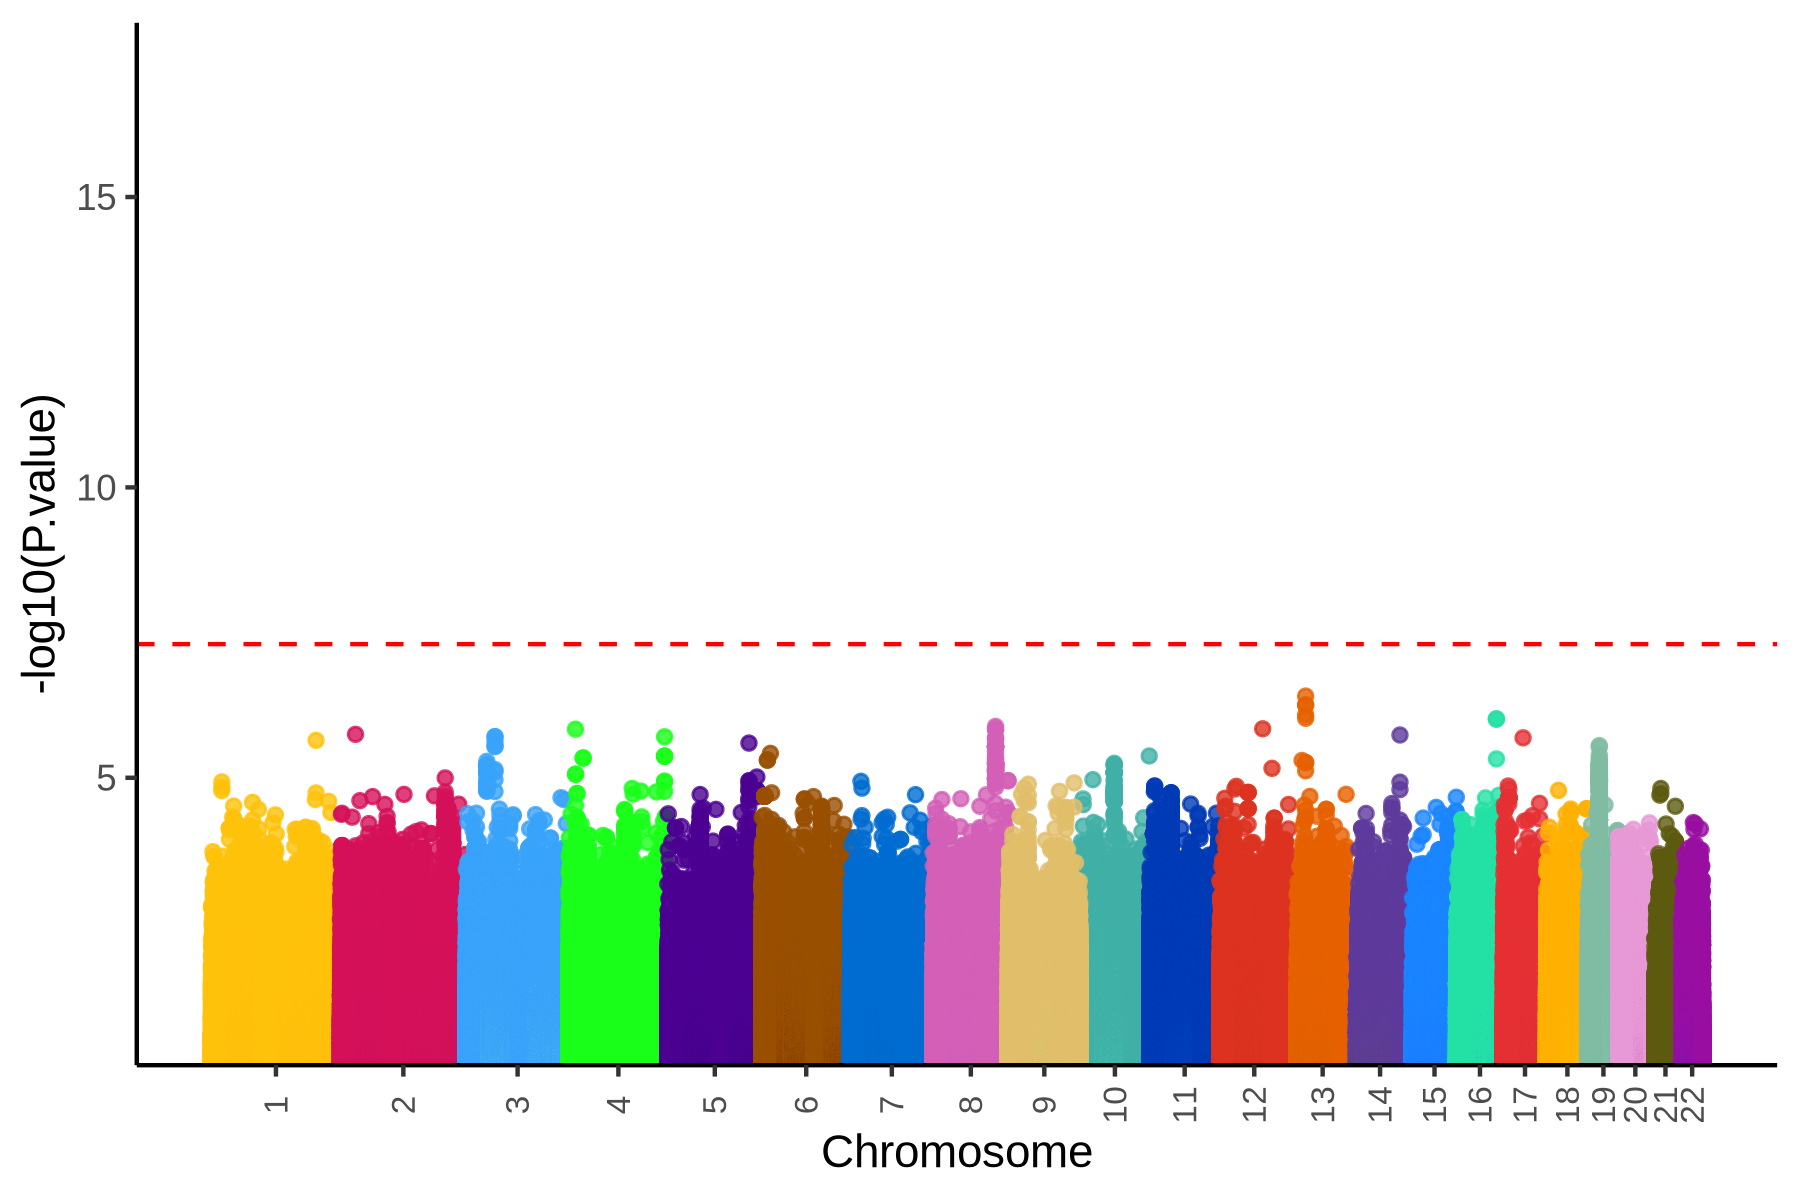

In [10]:
%preview ~/project_bst/AD_family_Rare_variants/AD_family_common_variants_NHW_APOE4.png

**Panel D: ADSP Non-Hispanic Whites**

In [12]:
file <- "/mnt/mfs/statgen/alzheimers-family/ADSP_2023/gmmat/apoe/European.pca.projected_outlier_removed_AD.GMMAT.snp_stats_original_columns.gz"
annofile <- "~/project_bst/annotation/ADSP_common_variants_NHW_APOE4.csv"
sample <- "ADSP"
out <- "~/project_bst/AD_family_Rare_variants/ADSP_common_variants_NHW_APOE4.png"
plots(file,annofile,sample,out)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '~/project_bst/annotation/ADSP_common_variants_NHW_APOE4.csv'”


png 
  2

> /home/bst2126/project_bst/AD_family_Rare_variants/ADSP_common_variants_NHW_APOE4.png (293.1 KiB):

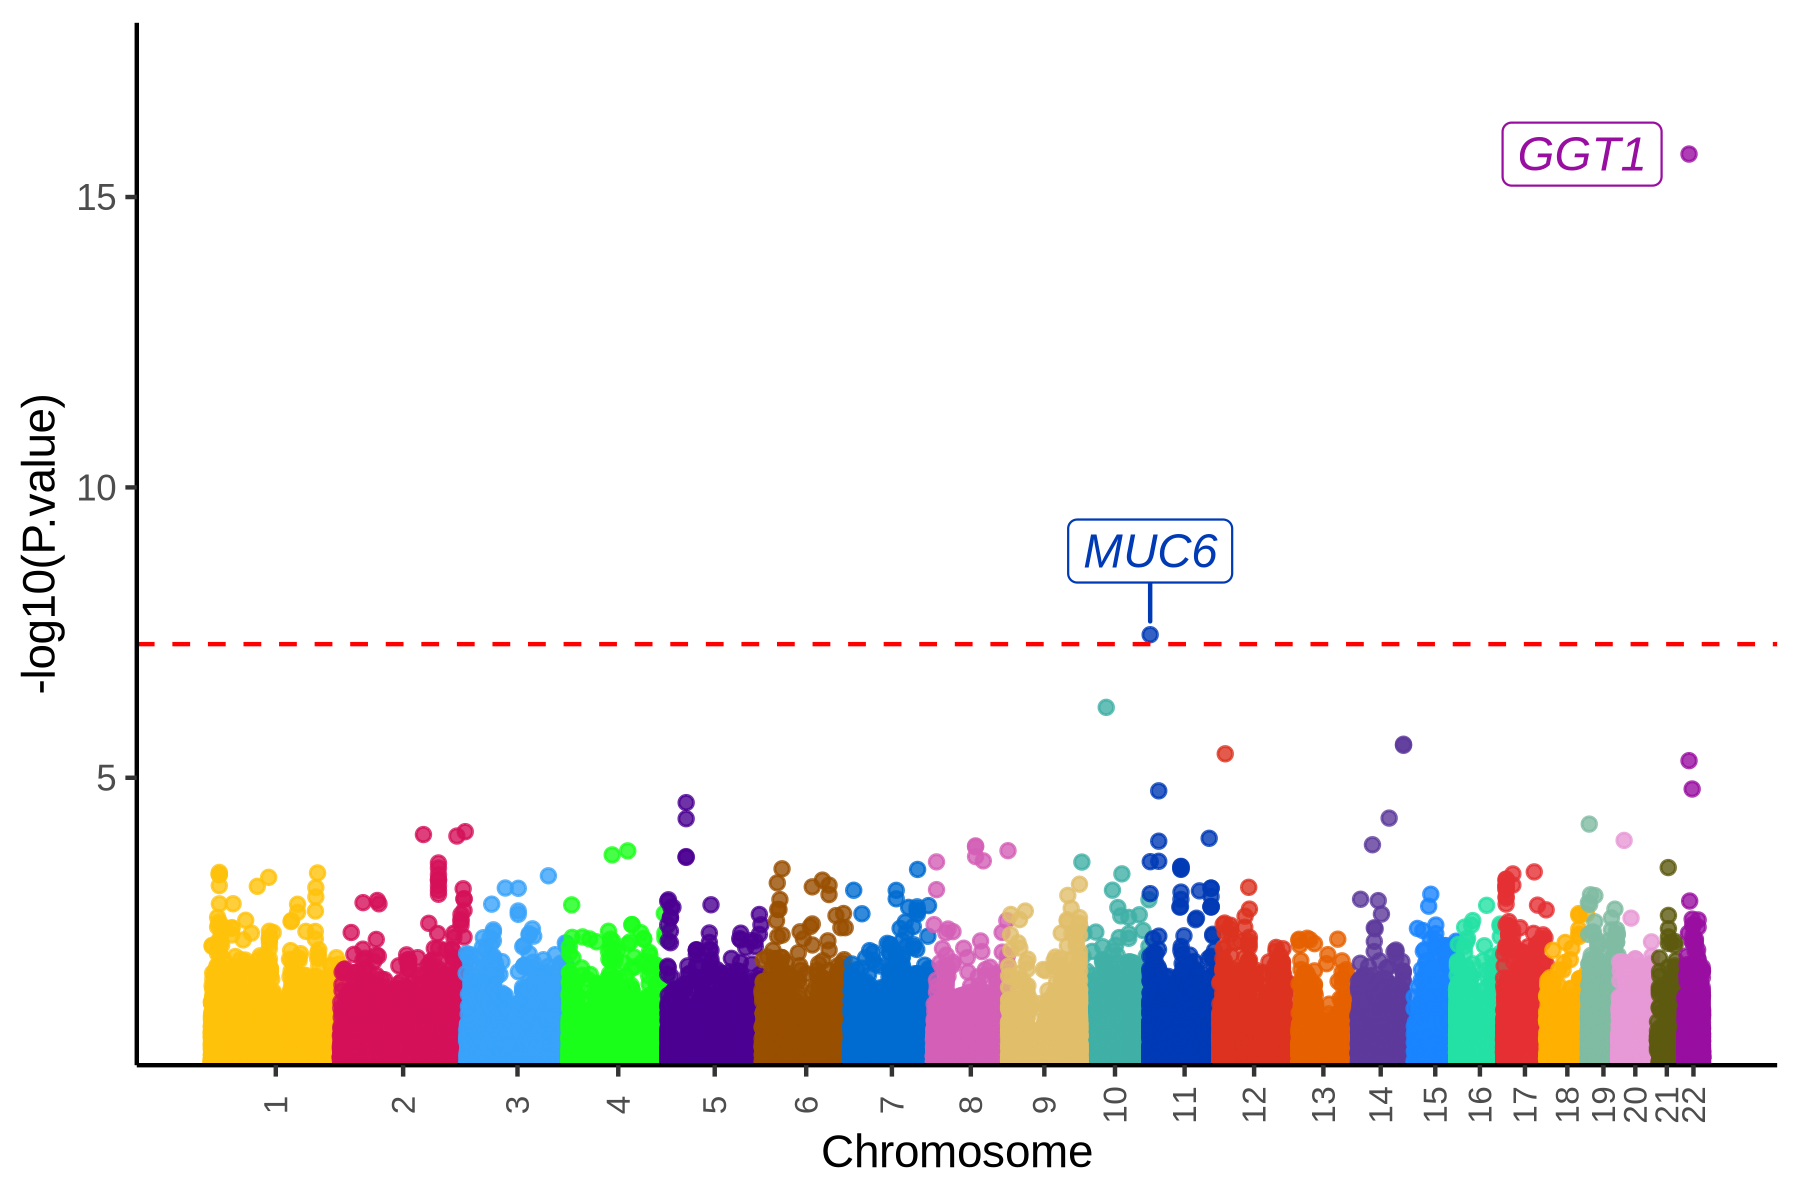

In [13]:
%preview ~/project_bst/AD_family_Rare_variants/ADSP_common_variants_NHW_APOE4.png

**Panel E: AD-family Carribean Hispanics**

In [14]:
file <- "/mnt/mfs/statgen/alzheimers-family/AD_common_variants/gmmat/results2/APOE4/Hispanic/Hispanic.pca.projected_AD.GMMAT.snp_stats_original_columns.gz"
annofile <- "~/project_bst/annotation/AD_family_common_variants_CH_APOE4.csv"
sample <- "AD_family"
out <- "~/project_bst/AD_family_Rare_variants/AD_family_common_variants_CH_APOE4.png"
plots(file,annofile,sample,out)

png 
  2

> /home/bst2126/project_bst/AD_family_Rare_variants/AD_family_common_variants_CH_APOE4.png (455.8 KiB):

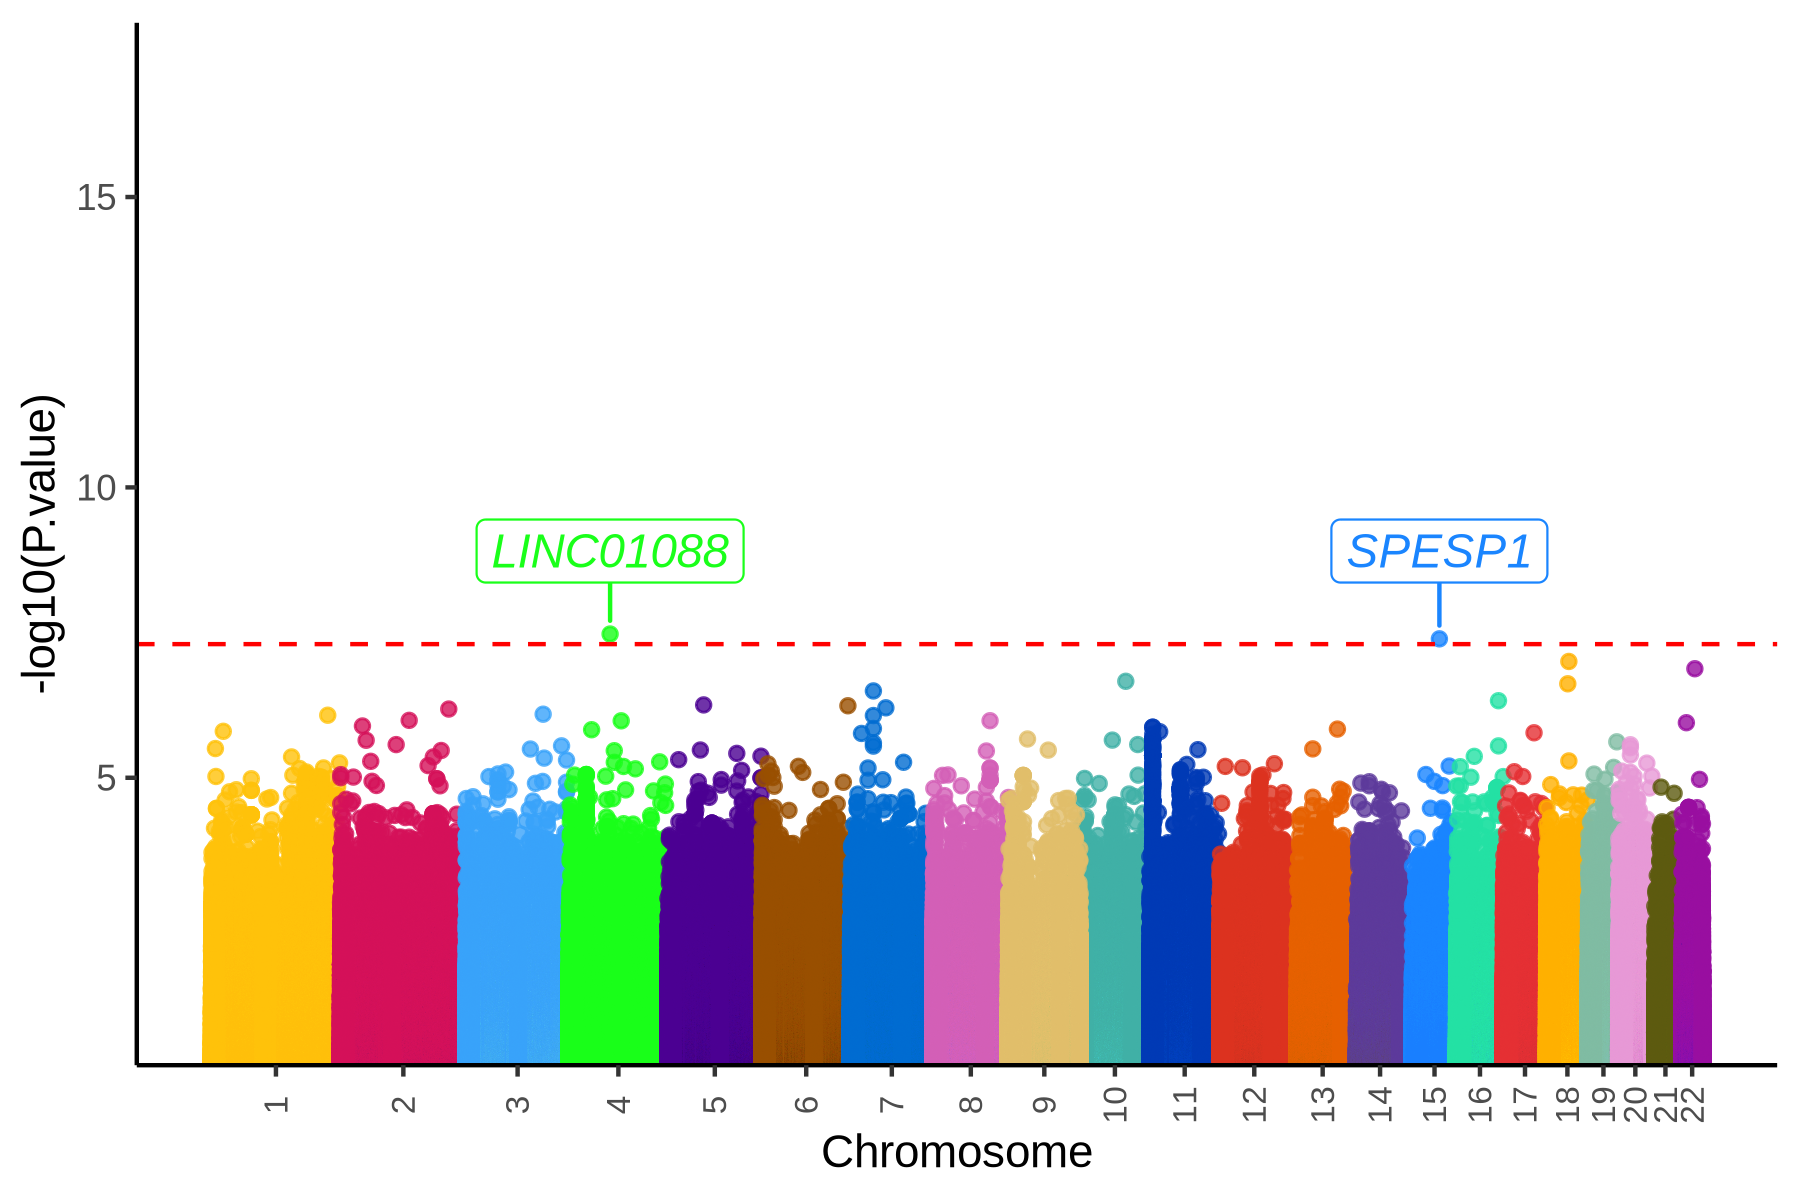

In [15]:
%preview ~/project_bst/AD_family_Rare_variants/AD_family_common_variants_CH_APOE4.png

**Panel F: ADSP Carribean Hispanics**

In [16]:
file <- "/mnt/mfs/statgen/alzheimers-family/ADSP_2023/gmmat/apoe/Hispanic.pca.projected_outlier_removed_AD.GMMAT.snp_stats_original_columns.gz"
annofile <- "~/project_bst/annotation/ADSP_common_variants_CH_APOE4.csv"
sample <- "ADSP"
out <- "~/project_bst/AD_family_Rare_variants/ADSP_common_variants_CH_APOE4.png"
plots(file,annofile,sample,out)

png 
  2

> /home/bst2126/project_bst/AD_family_Rare_variants/ADSP_common_variants_CH_APOE4.png (281.0 KiB):

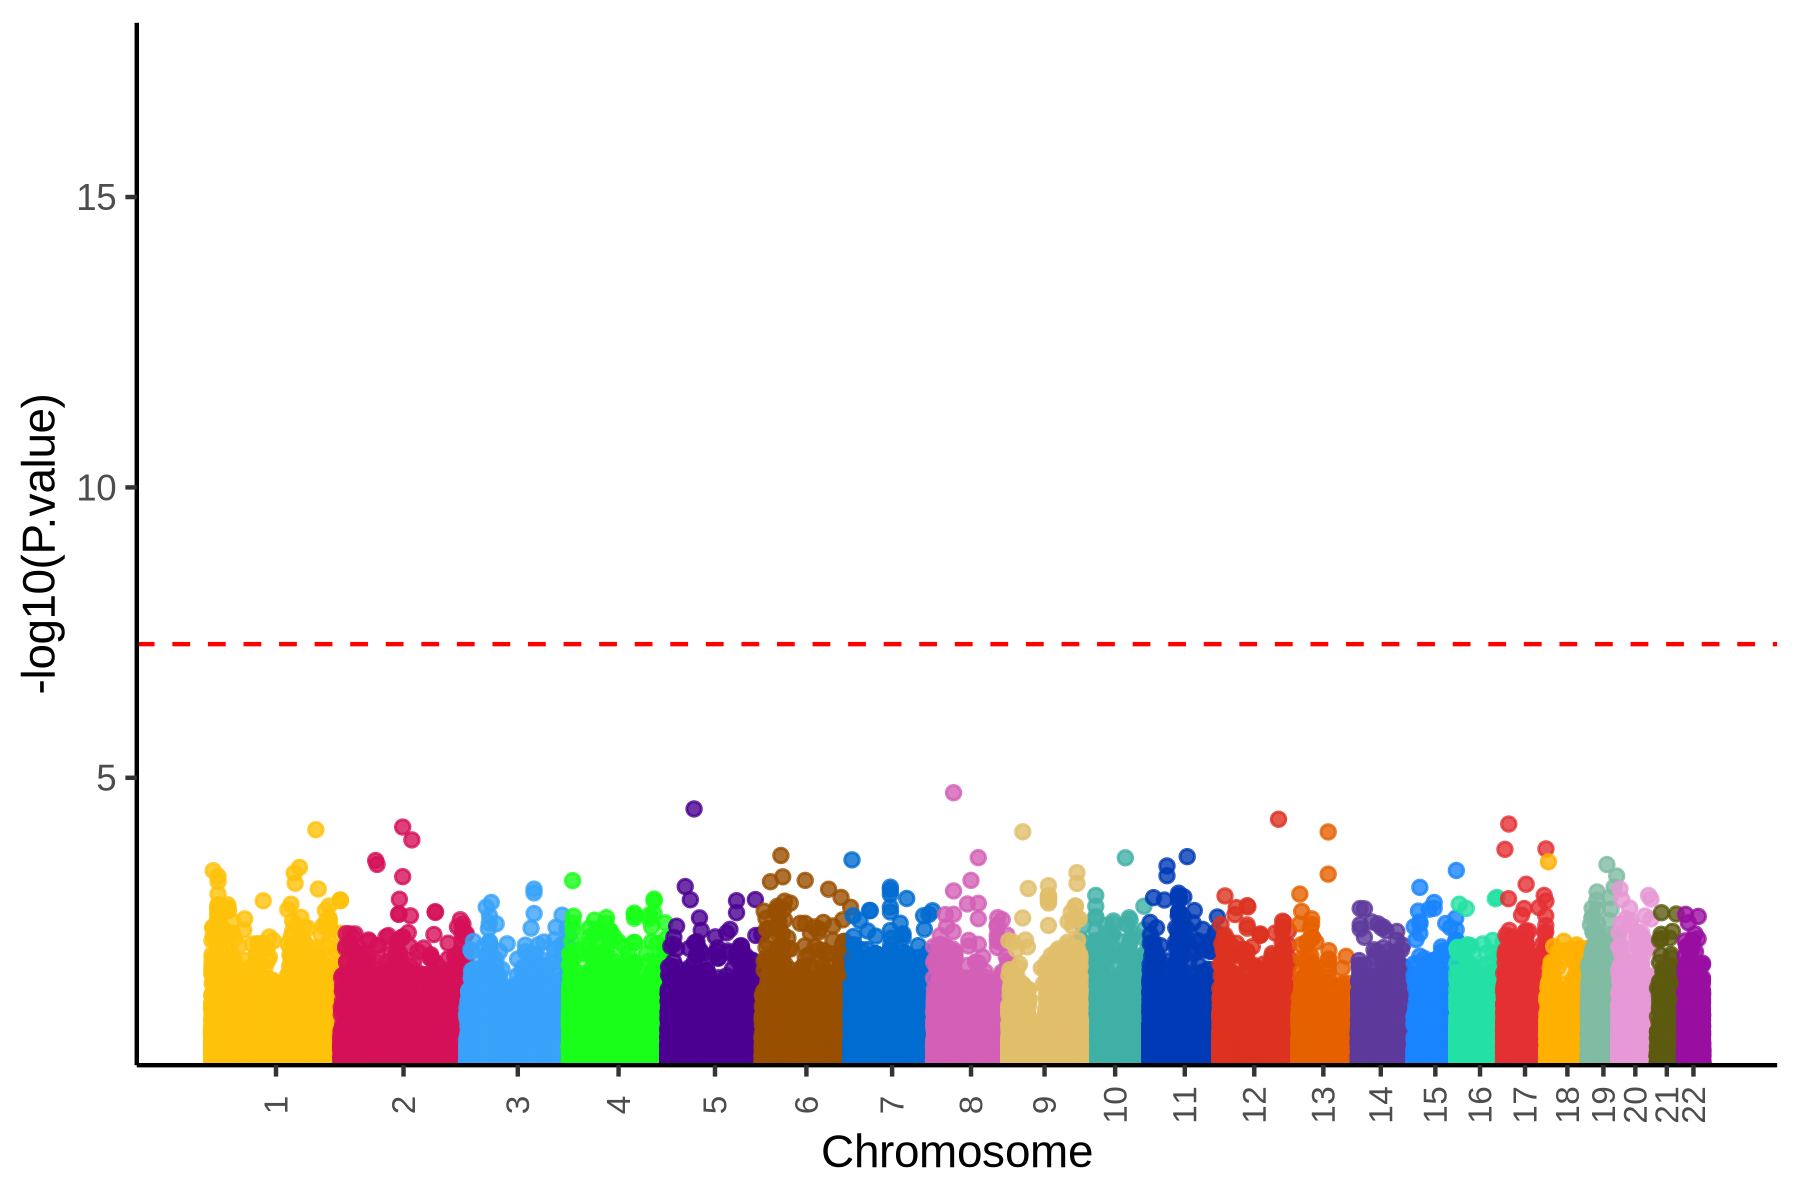

In [17]:
%preview ~/project_bst/AD_family_Rare_variants/ADSP_common_variants_CH_APOE4.png

**Panel G: AD-family African-Americans**

In [18]:
file <- "/mnt/mfs/statgen/alzheimers-family/AD_common_variants/gmmat/results2/APOE4/African/African.pca.projected_AD.GMMAT.snp_stats_original_columns.gz"
annofile <- "~/project_bst/annotation/AD_family_common_variants_AA_APOE4.csv"
sample <- "AD_family"
out <- "~/project_bst/AD_family_Rare_variants/AD_family_common_variants_AA_APOE4.png"
plots(file,annofile,sample,out)

png 
  2

> /home/bst2126/project_bst/AD_family_Rare_variants/AD_family_common_variants_AA_APOE4.png (417.6 KiB):

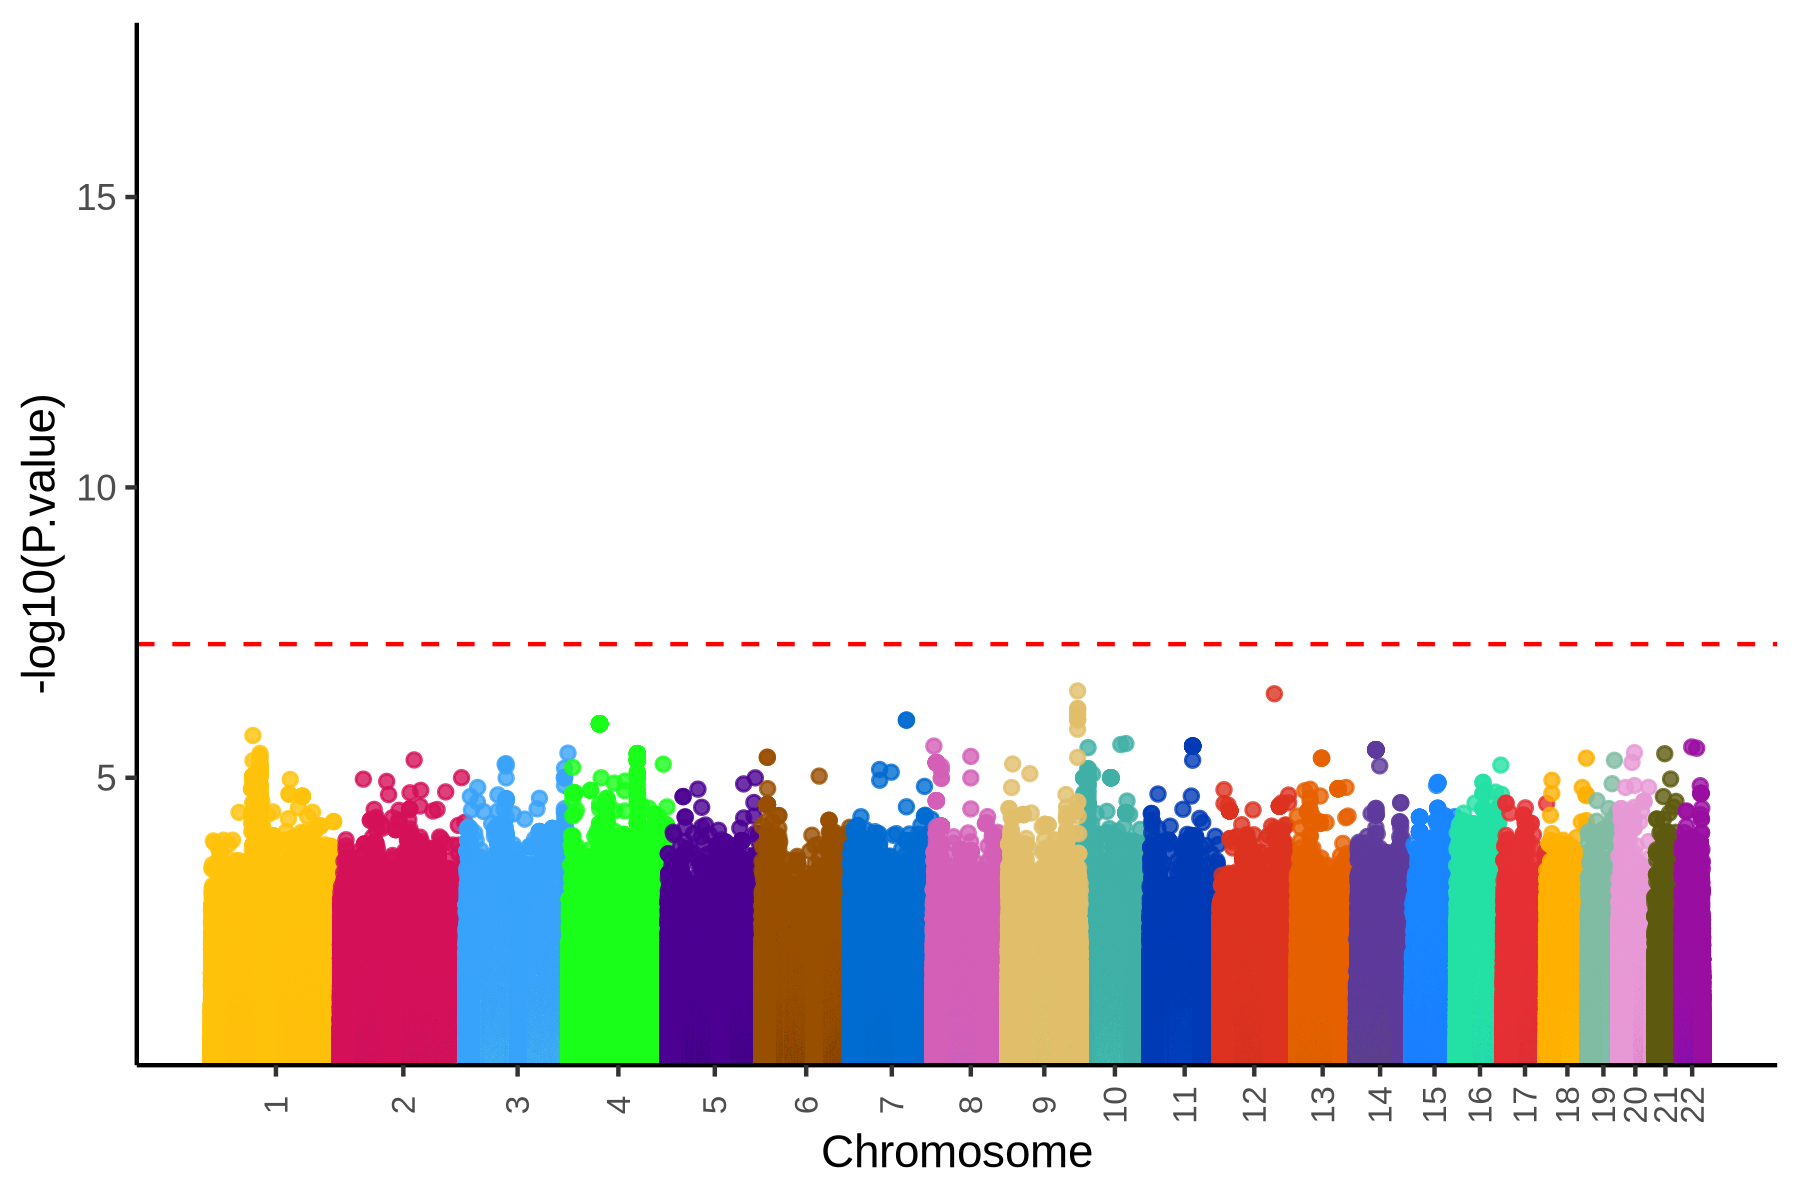

In [19]:
%preview ~/project_bst/AD_family_Rare_variants/AD_family_common_variants_AA_APOE4.png

**Panel H: ADSP African-Americans**

In [20]:
file <- "/mnt/mfs/statgen/alzheimers-family/ADSP_2023/gmmat/apoe/African.pca.projected_outlier_removed_AD.GMMAT.snp_stats_original_columns.gz"
annofile <- "~/project_bst/annotation/ADSP_common_variants_AA_APOE4.csv"
sample <- "ADSP"
out <- "~/project_bst/AD_family_Rare_variants/ADSP_common_variants_AA_APOE4.png"
plots(file,annofile,sample,out)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '~/project_bst/annotation/ADSP_common_variants_AA_APOE4.csv'”


png 
  2

> /home/bst2126/project_bst/AD_family_Rare_variants/ADSP_common_variants_AA_APOE4.png (296.9 KiB):

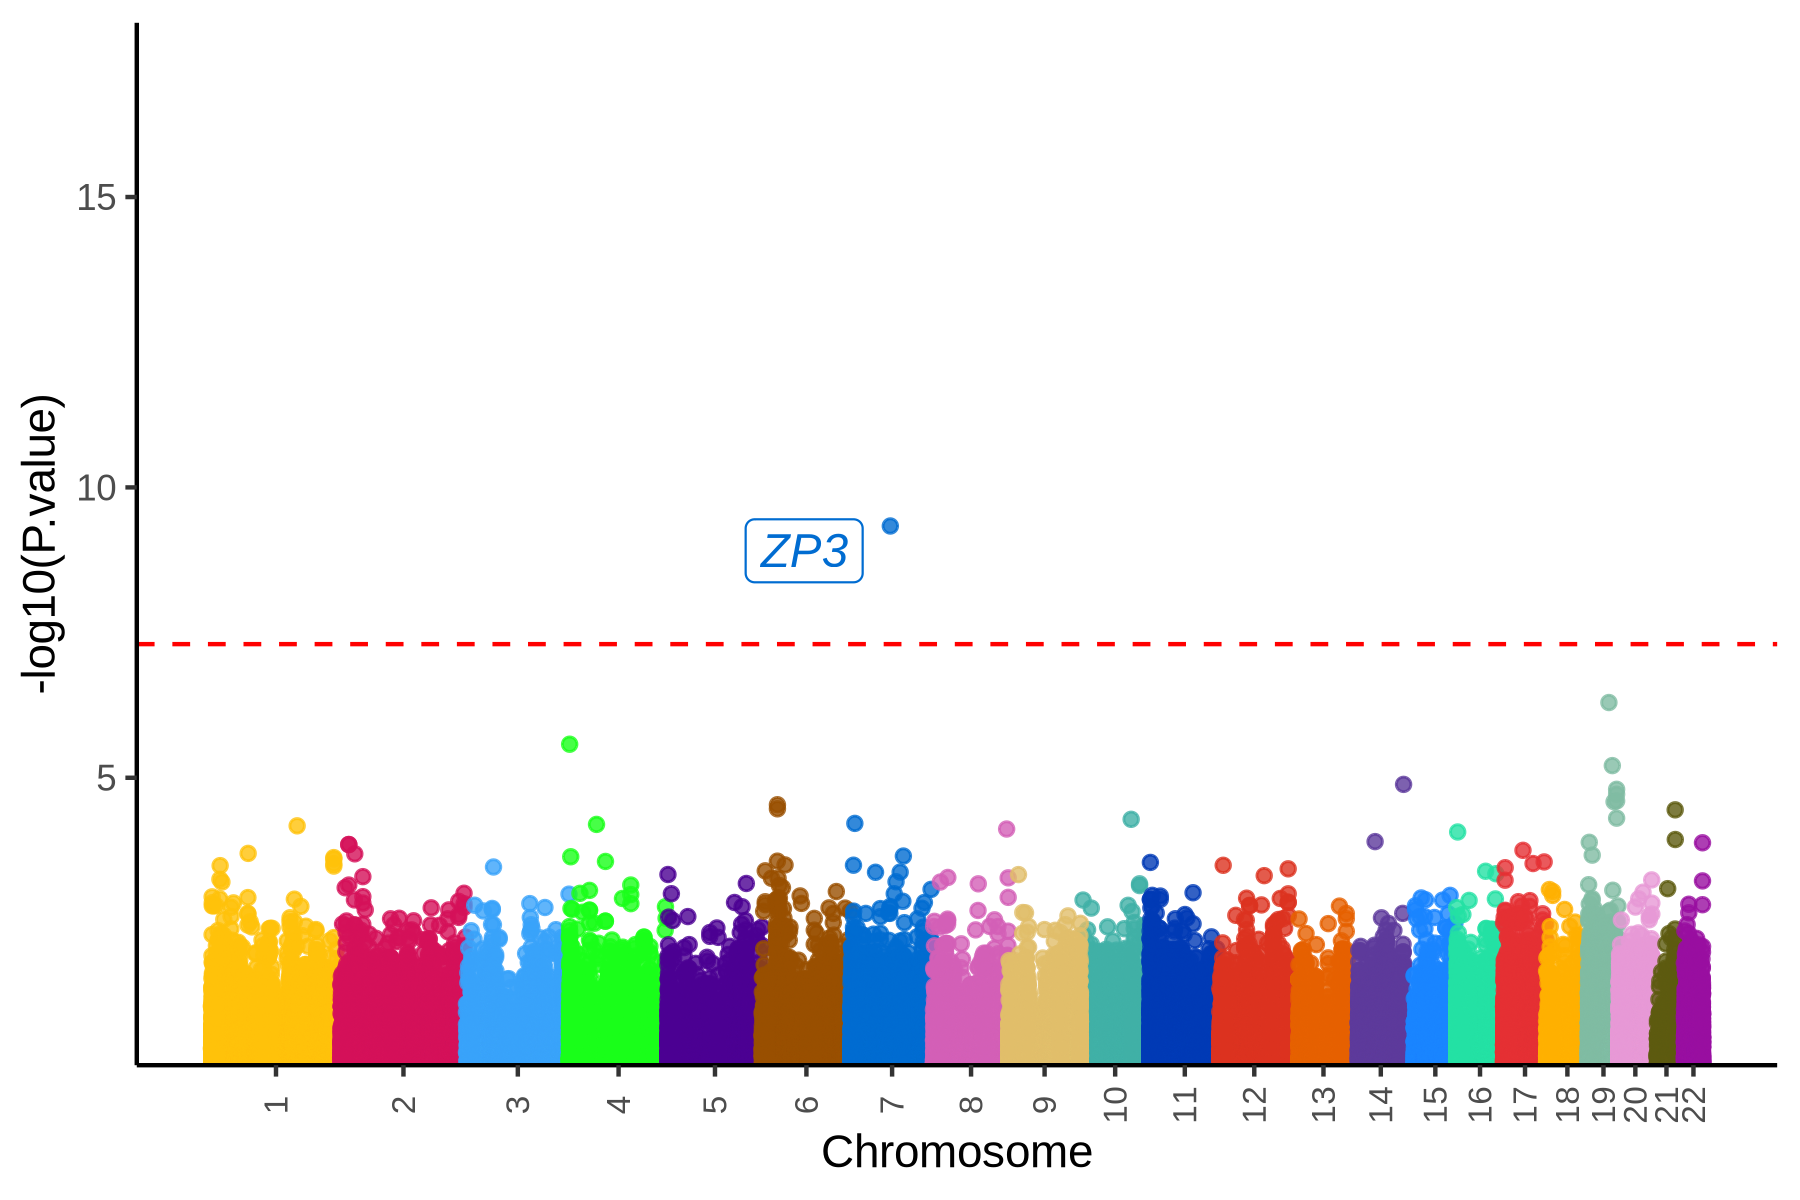

In [21]:
%preview ~/project_bst/AD_family_Rare_variants/ADSP_common_variants_AA_APOE4.png

In [ ]:
# Multi-panel figure for all AD-family and ADSP

In [22]:
# Create panel plots
library(patchwork)
library(png)
library(gridExtra)
library(grid)
library(ggplot2)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Saving 6.67 x 6.67 in image


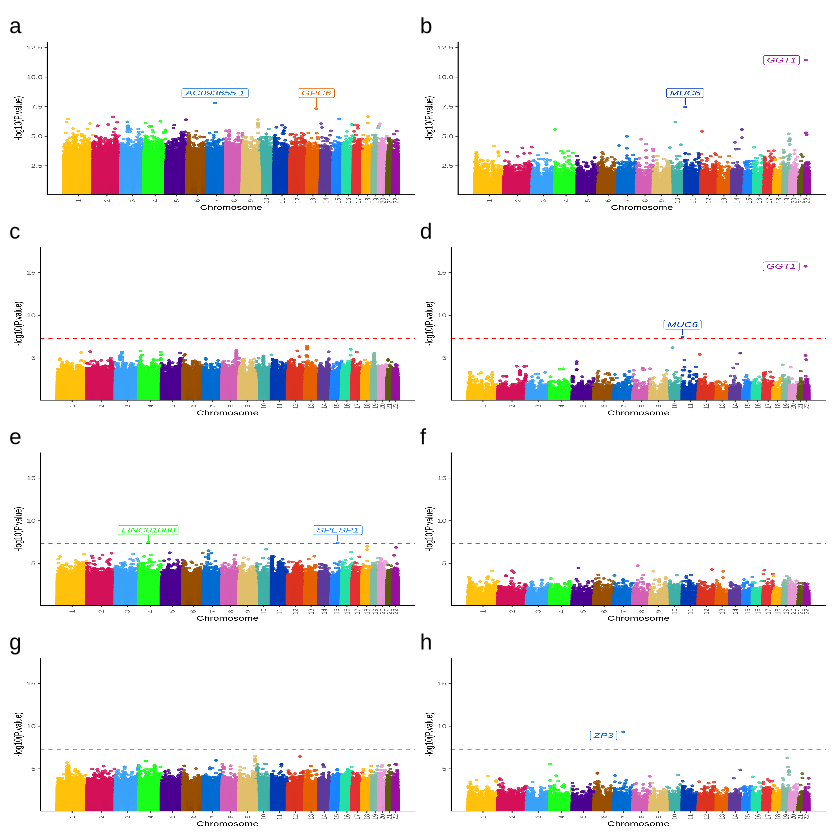

In [23]:
# File paths for your  PNG figures
file_paths <- c("~/project_bst/AD_family_Rare_variants/AD_family_common_variants_meta_APOE4.png",
                "~/project_bst/AD_family_Rare_variants/ADSP_common_variants_meta_APOE4.png",
               "~/project_bst/AD_family_Rare_variants/AD_family_common_variants_NHW_APOE4.png",
                "~/project_bst/AD_family_Rare_variants/ADSP_common_variants_NHW_APOE4.png",
               "~/project_bst/AD_family_Rare_variants/AD_family_common_variants_CH_APOE4.png",
                "~/project_bst/AD_family_Rare_variants/ADSP_common_variants_CH_APOE4.png",
               "~/project_bst/AD_family_Rare_variants/AD_family_common_variants_AA_APOE4.png",
                "~/project_bst/AD_family_Rare_variants/ADSP_common_variants_AA_APOE4.png")

# Create a list to store individual plots
plots <- lapply(seq_along(file_paths), function(i) {
  # Read PNG file and create a ggplot
  ggplot() +
    annotation_custom(rasterGrob(readPNG(file_paths[i]), width = 1, height = 1), xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) +
    theme_void() +  # Use theme_void to remove axis labels and ticks
    labs(title = letters[i])  # Add labels (A, B, C, etc.)
})

# Combine the individual plots into a single multiple-panel figure
combined_figure_all <- wrap_plots(plots, nrow = 4, ncol = 2)
ggsave("~/project_bst/AD_family_Rare_variants/plots/GMMAT/manhattan_APOE4.png", plot = combined_figure_all)
# Display the combined figure
combined_figure_all